# 🏨 Machine Learning para Previsão de Preços de Locação em São Paulo

## 📄 Contextualização

O mercado de locação em São Paulo é marcado por grande variação de preços, influenciado por fatores como localização, infraestrutura e perfil socioeconômico. Dados do Índice FipeZap (2024) mostram que bairros nobres, como Jardins e Vila Olímpia, ultrapassam R$ 45/m², enquanto regiões periféricas têm valores significativamente menores. A concentração de empregos, transporte e serviços nas áreas centrais eleva a demanda, enquanto imóveis com piscina, academia e vagas de garagem atingem preços mais altos. Além disso, a pandemia e a retomada econômica trouxeram mudanças na dinâmica do mercado, aumentando a complexidade na precificação.

Diante desse cenário, entender os determinantes dos preços é essencial para inquilinos, proprietários e corretores, que buscam tomar decisões mais assertivas em um mercado competitivo e volátil.

## 🚩 Problematização

Apesar da disponibilidade de dados, prever valores de aluguel em São Paulo é um desafio devido à interação complexa de múltiplos fatores. A heterogeneidade do mercado faz com que imóveis semelhantes em bairros diferentes tenham valores discrepantes, enquanto aspectos subjetivos, como segurança e status da região, dificultam a modelagem precisa. Além disso, a volatilidade econômica e a falta de padronização nos anúncios comprometem a qualidade das análises.

Essa complexidade exige modelos avançados de machine learning capazes de capturar relações não lineares e variáveis ocultas, oferecendo previsões mais confiáveis para auxiliar na tomada de decisão.

## 📚 Importação dos Dados

### Fonte dos Dados

Os dados utilizados no projeto foram obtidos na plataforma **Kaggle**, no conjunto São Paulo Real Estate Sale/Rent April 2019, disponível no link: [https://www.kaggle.com/datasets/argonalyst/sao-paulo-real-estate-sale-rent-april-2019](https://www.kaggle.com/datasets/argonalyst/sao-paulo-real-estate-sale-rent-april-2019). O dataset contém informações sobre imóveis à venda e para locação na cidade de São Paulo, incluindo características como preço, metragem, número de quartos, localização entre outras informações.

### Importação das Bibliotecas Essenciais para o Projeto

Ao longo do desenvolvimento deste projeto de previsão do preço de locação de imóveis na cidade de São Paulo, as bibliotecas adotadas foram escolhidas com base em critérios como, desempenho, facilidade de integração e robustez para análise e modelagem de dados reais complexos.

#### **Gdown**

- A biblioteca `gdown` foi utilizada para facilitar o download direto de datasets hospedados no Google Drive, eliminando etapas manuais e integrando o fluxo de dados ao pipeline de execução do notebook. Essa escolha permitiu automatizar a etapa de aquisição dos dados brutos, garantindo reprodutibilidade e praticidade, especialmente em ambientes de nuvem como Google Colab.

#### **Pandas e NumPy**
As bibliotecas `Pandas` e `NumPy` foram escolhidas para a manipulação e estruturação dos dados.

- `Pandas` oferece uma interface poderosa para leitura, limpeza e transformação de dados tabulares, algo essencial em um projeto baseado em bases de dados reais, como a de preços de aluguel em SP, marcada por possíveis valores ausentes, outliers e a necessidade de agregações.

- `NumPy`, por sua vez, é a base para operações numéricas vetorizadas de alta performance, sendo amplamente usada em operações intermediárias e no backend de outras bibliotecas.

#### **Matplotlib, Seaborn e Plotly**
Para a análise exploratória e visualização de resultados, optou-se por uma combinação de `Matplotlib`, `Seaborn` e `Plotly`:

- `Matplotlib` foi empregado para a construção de gráficos mais customizados e integrados a subplots complexos, permitindo controle fino de layout e estilo.

- `Seaborn` foi utilizado devido à sua integração nativa com `Pandas` e capacidade de produzir visualizações estatísticas como boxplots, scatterplots e heatmaps de forma concisa e com excelente estética.

- `Plotly`, por ser uma biblioteca interativa, permitiu criar gráficos dinâmicos, úteis especialmente em fases de exploração e para facilitar a análise de dispersão e clusters em valores de locação.

Essa escolha proporcionou flexibilidade: gráficos estáticos para relatórios e publicações, e gráficos interativos para análise em notebooks ou dashboards.

#### **Scikit-learn**
A biblioteca `Scikit-learn` foi a principal ferramenta para o desenvolvimento dos modelos de machine learning e avaliação de desempenho.

- `LinearRegression`, `DecisionTreeRegressor` e `RandomForestRegressor` foram escolhidos por representarem três paradigmas distintos (modelo linear, árvore simples e ensemble), permitindo comparações críticas quanto ao poder de generalização e risco de overfitting em um problema com alta complexidade e não-linearidade.

- `KMeans` foi usado para a clusterização de bairros e regiões com base em características como preço e localização geográfica, enriquecendo o conjunto de atributos com variáveis derivadas de agrupamentos não supervisionados.

- `cross_val_score` e `GridSearchCV` foram fundamentais para validação cruzada e ajuste fino de hiperparâmetros, garantindo maior rigor estatístico na avaliação e melhor ajuste dos modelos.

- `train_test_split` e métricas como `mean_squared_error` e `r2_score` foram aplicadas para segmentação do dataset e avaliação quantitativa dos modelos, seguindo boas práticas de machine learning supervisionado.

#### Código

In [70]:
import gdown
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

### Acesso e Manipulação Inicial do DataFrame

Para este projeto, os dados foram armazenados no Google Drive, garantindo fácil acesso e compartilhamento entre diferentes ambientes e dispositivos. O arquivo foi acessado diretamente pelo Google Colab, o que permite a integração prática com o Drive sem a necessidade de download local. Essa abordagem torna o fluxo de trabalho mais dinâmico e seguro, além de facilitar atualizações no dataset durante o desenvolvimento do projeto.

In [71]:
file_id = "1VM0dzoD094zByUsLJ8SiQ931K7Km3Ao6"
url = f"https://drive.google.com/uc?id={file_id}"
output = "sao-paulo-properties-april-2019.csv"
gdown.download(url, output, quiet=False)
df = pd.read_csv("sao-paulo-properties-april-2019.csv")
df_copy = df.copy()
df_copy.head()

Downloading...
From: https://drive.google.com/uc?id=1VM0dzoD094zByUsLJ8SiQ931K7Km3Ao6
To: /content/sao-paulo-properties-april-2019.csv
100%|██████████| 1.20M/1.20M [00:00<00:00, 11.0MB/s]


,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436


## 🔶 Tratamento de Dados

O tratamento de dados é uma etapa fundamental neste projeto, pois garante que o conjunto de informações esteja limpo, organizado e preparado para as análises e modelagens preditivas. Durante esse processo, são aplicadas técnicas para ajustar inconsistências, lidar com dados faltantes, transformar colunas e criar variáveis adicionais que possam enriquecer a base de dados. O objetivo é estruturar os dados de maneira que representem melhor a realidade e contribuam para a construção de modelos mais precisos e análises mais robustas sobre os preços de locação de imóveis em São Paulo.

### Visualização das Colunas, Tipos de Dados e Valores Únicos

Nesta etapa do projeto, foi realizada uma análise exploratória inicial para entender a estrutura do conjunto de dados. Foram listadas as colunas disponíveis no DataFrame, seus respectivos tipos de dados (`int`, `float`, `object`) e o número de valores únicos em cada uma. Isso possibilitou identificar quais variáveis eram numéricas, categóricas ou possivelmente inconsistentes, além de fornecer uma visão geral sobre a diversidade e qualidade das informações presentes na base. Essa análise preliminar é essencial para planejar o tratamento dos dados e as estratégias de modelagem.

In [72]:
for col in df_copy: print(f"Column: {col} | Type: {df_copy[col].dtype} | Unique Values: {df_copy[col].nunique()}")

Column: Price | Type: int64 | Unique Values: 1881
Column: Condo | Type: int64 | Unique Values: 1415
Column: Size | Type: int64 | Unique Values: 339
Column: Rooms | Type: int64 | Unique Values: 8
Column: Toilets | Type: int64 | Unique Values: 8
Column: Suites | Type: int64 | Unique Values: 7
Column: Parking | Type: int64 | Unique Values: 10
Column: Elevator | Type: int64 | Unique Values: 2
Column: Furnished | Type: int64 | Unique Values: 2
Column: Swimming Pool | Type: int64 | Unique Values: 2
Column: New | Type: int64 | Unique Values: 2
Column: District | Type: object | Unique Values: 96
Column: Negotiation Type | Type: object | Unique Values: 2
Column: Property Type | Type: object | Unique Values: 1
Column: Latitude | Type: float64 | Unique Values: 8405
Column: Longitude | Type: float64 | Unique Values: 8451


### Construção e Inicialização do DataFrame de Locação `df_rent`

O DataFrame `df_rent` foi criado a partir da leitura do arquivo contendo os dados brutos de locação de imóveis na cidade de São Paulo. Essa estrutura foi escolhida para armazenar e manipular as informações de forma eficiente durante todo o projeto. O `df_rent` serve como a base principal para as etapas de tratamento, análise exploratória e modelagem preditiva, permitindo aplicar filtros, transformações e cálculos necessários para extrair insights e construir os modelos de previsão de preço de aluguel.

In [73]:
df_rent = df_copy[df_copy['Negotiation Type'] == 'rent']
df_rent = df_rent.copy()
df_rent.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436


### Limpeza e Tratamento do DataFrame `df_rent`

Após a criação do DataFrame `df_rent`, foi realizada a limpeza dos dados para garantir a qualidade e a confiabilidade do modelo de previsão de preços de locação em São Paulo. Inicialmente, foram removidos os valores nulos presentes nas variáveis, pois dados incompletos podem comprometer o desempenho do modelo. Além disso, registros duplicados foram eliminados para evitar vieses e redundâncias no treinamento, garantindo que cada amostra represente uma observação única. Essas etapas são fundamentais para assegurar a integridade do conjunto de dados antes da aplicação das técnicas de machine learning.

In [74]:
df_rent.drop_duplicates()
df_rent.dropna()
df_rent.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436


### Extração e Estruturação das Colunas Neighbour e State a partir da Coluna District

A partir da coluna original District, que contém informações combinadas no formato "Bairro/Estado", foi realizada a separação dos dados em duas novas colunas distintas: Neighbour e State. Para isso, utilizou-se a função de divisão de strings (split) com o caractere separador "/", extraindo a primeira parte para a coluna Neighbour (bairro) e a segunda para a coluna State (estado). Após essa operação, a coluna District original foi removida para evitar redundância e facilitar a manipulação dos dados nos processos subsequentes.

In [75]:
df_rent[["Neighbour", "State"]] = df_rent["District"].str.split("/", expand=True)
df_rent = df_rent.drop(columns=["District"])
df_rent.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Negotiation Type,Property Type,Latitude,Longitude,Neighbour,State
0,930,220,47,2,2,1,1,0,0,0,0,rent,apartment,-23.543138,-46.479486,Artur Alvim,São Paulo
1,1000,148,45,2,2,1,1,0,0,0,0,rent,apartment,-23.550239,-46.480718,Artur Alvim,São Paulo
2,1000,100,48,2,2,1,1,0,0,0,0,rent,apartment,-23.542818,-46.485665,Artur Alvim,São Paulo
3,1000,200,48,2,2,1,1,0,0,0,0,rent,apartment,-23.547171,-46.483014,Artur Alvim,São Paulo
4,1300,410,55,2,2,1,1,1,0,0,0,rent,apartment,-23.525025,-46.482436,Artur Alvim,São Paulo


### Validação e Correção das Coordenadas Geográficas (Latitude e Longitude)

Durante a análise inicial dos dados, foram identificados valores incorretos nas colunas de latitude e longitude, como coordenadas fora da área geográfica esperada para São Paulo. Para garantir a precisão espacial do modelo, esses dados foram corrigidos ou removidos, assegurando que as localizações representadas fossem consistentes e válidas dentro do contexto da cidade. Essa etapa é essencial para evitar distorções nas análises baseadas em localização.

In [76]:
df_rent = df_rent[
    (df_rent["Latitude"] >= -25.5) & (df_rent["Latitude"] <= -19.5) &
    (df_rent["Longitude"] >= -53.1) & (df_rent["Longitude"] <= -44)
].copy()
df_rent.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Negotiation Type,Property Type,Latitude,Longitude,Neighbour,State
0,930,220,47,2,2,1,1,0,0,0,0,rent,apartment,-23.543138,-46.479486,Artur Alvim,São Paulo
1,1000,148,45,2,2,1,1,0,0,0,0,rent,apartment,-23.550239,-46.480718,Artur Alvim,São Paulo
2,1000,100,48,2,2,1,1,0,0,0,0,rent,apartment,-23.542818,-46.485665,Artur Alvim,São Paulo
3,1000,200,48,2,2,1,1,0,0,0,0,rent,apartment,-23.547171,-46.483014,Artur Alvim,São Paulo
4,1300,410,55,2,2,1,1,1,0,0,0,rent,apartment,-23.525025,-46.482436,Artur Alvim,São Paulo


## 🔷 Preparação dos Dados para Modelos de Machine Learning

### Segmentação Espacial: Formação de Clusters para Análise Regional de Preços

Para identificar padrões espaciais e agrupar regiões com características semelhantes, foi aplicado um algoritmo de clustering sobre os dados geográficos. Essa segmentação permitiu criar grupos de bairros com perfis de preço e localização próximos, facilitando a modelagem e melhorando a capacidade preditiva ao considerar a heterogeneidade do mercado imobiliário de São Paulo. A técnica escolhida permitiu captar variações locais importantes que influenciam o valor do aluguel.

In [77]:
coords = df_rent[["Latitude", "Longitude"]].to_numpy()
n_clusters = 500
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_rent["Cluster"] = kmeans.fit_predict(coords)

### Análise Agregada: Cálculo da Média de Preços de Locação por Cluster

Após a criação dos clusters, foi calculada a média dos preços de locação em cada grupo. Essa análise permitiu compreender o comportamento médio do mercado dentro de cada segmento, evidenciando diferenças regionais e facilitando a interpretação dos resultados. O cálculo das médias por cluster também serviu como insumo para validar a coerência dos agrupamentos e refinar o modelo preditivo.

In [78]:
mean_price_per_cluster = df_rent.groupby("Cluster")["Price"].mean().rename("Mean_Price_Cluster")
df_rent = df_rent.join(mean_price_per_cluster, on="Cluster")
df_rent.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Negotiation Type,Property Type,Latitude,Longitude,Neighbour,State,Cluster,Mean_Price_Cluster
0,930,220,47,2,2,1,1,0,0,0,0,rent,apartment,-23.543138,-46.479486,Artur Alvim,São Paulo,316,978.571429
1,1000,148,45,2,2,1,1,0,0,0,0,rent,apartment,-23.550239,-46.480718,Artur Alvim,São Paulo,26,1021.666667
2,1000,100,48,2,2,1,1,0,0,0,0,rent,apartment,-23.542818,-46.485665,Artur Alvim,São Paulo,157,971.428571
3,1000,200,48,2,2,1,1,0,0,0,0,rent,apartment,-23.547171,-46.483014,Artur Alvim,São Paulo,316,978.571429
4,1300,410,55,2,2,1,1,1,0,0,0,rent,apartment,-23.525025,-46.482436,Artur Alvim,São Paulo,258,1175.000000


### Geração de Identificadores Únicos para Bairros e Agregação da Média de Preços de Locação

Foi criado um identificador numérico único para cada bairro (Neighbour) a fim de facilitar a manipulação e a análise dos dados. Em seguida, calculou-se a média dos preços de locação para cada bairro, permitindo capturar a variação regional dos valores e incorporá-la como uma feature relevante para o modelo. Essa abordagem ajuda a representar características locais específicas e contribui para a precisão da previsão.

In [79]:
neighbour_id_map = {neighbour: idx for idx, neighbour in enumerate(df_rent["Neighbour"].unique())}
df_rent["Neighbour_ID"] = df_rent["Neighbour"].map(neighbour_id_map)
mean_price_per_neighbour = df_rent.groupby("Neighbour")["Price"].mean().rename("Mean_Price_Neighbour")
df_rent = df_rent.join(mean_price_per_neighbour, on="Neighbour")
df_rent.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,...,Negotiation Type,Property Type,Latitude,Longitude,Neighbour,State,Cluster,Mean_Price_Cluster,Neighbour_ID,Mean_Price_Neighbour
0,930,220,47,2,2,1,1,0,0,0,...,rent,apartment,-23.543138,-46.479486,Artur Alvim,São Paulo,316,978.571429,0,991.8
1,1000,148,45,2,2,1,1,0,0,0,...,rent,apartment,-23.550239,-46.480718,Artur Alvim,São Paulo,26,1021.666667,0,991.8
2,1000,100,48,2,2,1,1,0,0,0,...,rent,apartment,-23.542818,-46.485665,Artur Alvim,São Paulo,157,971.428571,0,991.8
3,1000,200,48,2,2,1,1,0,0,0,...,rent,apartment,-23.547171,-46.483014,Artur Alvim,São Paulo,316,978.571429,0,991.8
4,1300,410,55,2,2,1,1,1,0,0,...,rent,apartment,-23.525025,-46.482436,Artur Alvim,São Paulo,258,1175.000000,0,991.8


### Cálculo do Valor do Metro Quadrado por Apartamento e Média por Bairro

Para refinar a análise dos preços de locação, foi calculado o valor do metro quadrado para cada apartamento, dividindo-se o preço total pelo tamanho do imóvel em metros quadrados. Em seguida, foi feita a agregação desses valores para obter a média do metro quadrado em cada bairro, o que permitiu identificar variações regionais mais precisas e fornece uma base sólida para o modelo prever preços considerando as características locais do mercado imobiliário.

In [80]:
df_rent["Price_per_m2"] = df_rent["Price"] / df_rent["Size"]
mean_m2_per_neighbour = df_rent.groupby("Neighbour")["Price_per_m2"].mean().rename("Mean_Price_per_m2_Neighbour")
df_rent = df_rent.join(mean_m2_per_neighbour, on="Neighbour")
df_rent.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,...,Latitude,Longitude,Neighbour,State,Cluster,Mean_Price_Cluster,Neighbour_ID,Mean_Price_Neighbour,Price_per_m2,Mean_Price_per_m2_Neighbour
0,930,220,47,2,2,1,1,0,0,0,...,-23.543138,-46.479486,Artur Alvim,São Paulo,316,978.571429,0,991.8,19.787234,18.904756
1,1000,148,45,2,2,1,1,0,0,0,...,-23.550239,-46.480718,Artur Alvim,São Paulo,26,1021.666667,0,991.8,22.222222,18.904756
2,1000,100,48,2,2,1,1,0,0,0,...,-23.542818,-46.485665,Artur Alvim,São Paulo,157,971.428571,0,991.8,20.833333,18.904756
3,1000,200,48,2,2,1,1,0,0,0,...,-23.547171,-46.483014,Artur Alvim,São Paulo,316,978.571429,0,991.8,20.833333,18.904756
4,1300,410,55,2,2,1,1,1,0,0,...,-23.525025,-46.482436,Artur Alvim,São Paulo,258,1175.000000,0,991.8,23.636364,18.904756


### Criação do DataFrame Filtrado para Modelos de Machine Learning `df_copy_filtered`

O DataFrame `df_copy_filtered` foi criado a partir do conjunto original para ser a base principal no treinamento dos modelos de machine learning. Essa filtragem envolveu a seleção das colunas relevantes e a remoção de dados inconsistentes ou desnecessários, garantindo que o conjunto final estivesse preparado e otimizado para a análise preditiva. Utilizar um DataFrame dedicado evita interferências de dados irrelevantes e melhora a eficiência dos algoritmos.

In [81]:
cols = [
    "Price",
    "Condo",
    "Size",
    "Rooms",
    "Toilets",
    "Suites",
    "Parking",
    "Elevator",
    "Furnished",
    "Swimming Pool",
    "New",
    "Neighbour_ID",
    "Cluster",
    "Mean_Price_Cluster",
    "Mean_Price_Neighbour",
    "Price_per_m2",
    "Mean_Price_per_m2_Neighbour"
]

df_copy_filtered = df_rent[cols].copy()
df_copy_filtered.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Neighbour_ID,Cluster,Mean_Price_Cluster,Mean_Price_Neighbour,Price_per_m2,Mean_Price_per_m2_Neighbour
0,930,220,47,2,2,1,1,0,0,0,0,0,316,978.571429,991.8,19.787234,18.904756
1,1000,148,45,2,2,1,1,0,0,0,0,0,26,1021.666667,991.8,22.222222,18.904756
2,1000,100,48,2,2,1,1,0,0,0,0,0,157,971.428571,991.8,20.833333,18.904756
3,1000,200,48,2,2,1,1,0,0,0,0,0,316,978.571429,991.8,20.833333,18.904756
4,1300,410,55,2,2,1,1,1,0,0,0,0,258,1175.000000,991.8,23.636364,18.904756


### Conclusão da Preparação do Dataset Final

Após todas as etapas de limpeza, transformação e seleção, o dataset final foi consolidado, contendo todas as variáveis essenciais para o desenvolvimento e treinamento dos modelos de machine learning. Esse conjunto está estruturado para garantir a qualidade, coerência e relevância dos dados, proporcionando uma base robusta para a previsão precisa dos preços de locação em São Paulo.

In [82]:
df_copy_filtered.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Neighbour_ID,Cluster,Mean_Price_Cluster,Mean_Price_Neighbour,Price_per_m2,Mean_Price_per_m2_Neighbour
0,930,220,47,2,2,1,1,0,0,0,0,0,316,978.571429,991.8,19.787234,18.904756
1,1000,148,45,2,2,1,1,0,0,0,0,0,26,1021.666667,991.8,22.222222,18.904756
2,1000,100,48,2,2,1,1,0,0,0,0,0,157,971.428571,991.8,20.833333,18.904756
3,1000,200,48,2,2,1,1,0,0,0,0,0,316,978.571429,991.8,20.833333,18.904756
4,1300,410,55,2,2,1,1,1,0,0,0,0,258,1175.000000,991.8,23.636364,18.904756


## 🎲 Análise Exploratória dos Dados

Nesta etapa inicial, foram exploradas as principais características do dataset para compreender a distribuição das variáveis, identificar padrões, detectar possíveis inconsistências, e analisar correlações entre os atributos. Essa análise fundamenta as decisões sobre o pré-processamento dos dados e a escolha das features para o modelo, garantindo uma base sólida para o desenvolvimento da previsão de preços de locação.

### Visualização Geográfica Segmentada por Clusters

A visualização geográfica separada por clusters permite identificar regiões agrupadas por similaridade em características relevantes, como faixa de preço, infraestrutura e perfil do imóvel, sem se limitar às divisões administrativas oficiais. Essa segmentação destaca zonas de comportamento homogêneo no mercado de locação, evidenciando microáreas que compartilham padrões de valor. Esse tipo de análise ajuda a capturar nuances que impactam diretamente no preço dos imóveis e fornece uma base mais precisa para os modelos de machine learning.

In [83]:
fig = go.Figure(go.Scattermapbox(
    lat=df_rent["Latitude"],
    lon=df_rent["Longitude"],
    mode="markers",
    marker=go.scattermapbox.Marker(
        size=6,
        color=df_rent["Cluster"],
        colorscale="Turbo",
        showscale=False
    ),
    hoverinfo="none"
))

fig.update_layout(
    mapbox=dict(
        style="carto-positron",
        center=dict(
            lat=df_rent["Latitude"].mean(),
            lon=df_rent["Longitude"].mean()
        ),
        zoom=10
    ),
    margin={"r":0, "t":0, "l":0, "b":0},
    height=700
)

fig.show()


### Visualização Geográfica Segmentada por Bairros

Por outro lado, a visualização por bairros utiliza as divisões administrativas tradicionais para analisar os preços de locação. Embora útil para observar tendências gerais e facilitar a interpretação por quem conhece a cidade, essa abordagem pode ocultar diferenças significativas dentro de um mesmo bairro. Comparado aos clusters, o mapa por bairros tende a ser menos preciso para revelar zonas homogêneas de preço, já que não considera as semelhanças reais entre áreas próximas que podem pertencer a bairros diferentes.

In [84]:
fig = go.Figure(go.Scattermapbox(
    lat=df_rent["Latitude"],
    lon=df_rent["Longitude"],
    mode="markers",
    marker=go.scattermapbox.Marker(
        size=6,
        color=df_rent["Neighbour_ID"],
        colorscale="Turbo",
        showscale=False
    ),
    hoverinfo="none"
))
fig.update_layout(
    mapbox=dict(
        style="carto-positron",
        center=dict(
            lat=df_rent["Latitude"].mean(),
            lon=df_rent["Longitude"].mean()
        ),
        zoom=10
    ),
    margin={"r":0, "t":0, "l":0, "b":0},
    height=700
)
fig.show()

### Análise de Correlação para Identificação de Relações Entre Variáveis

A análise de correlação será realizada para identificar a intensidade e a direção das relações entre as variáveis do conjunto de dados. Esse tipo de análise é essencial antes do desenvolvimento de modelos de machine learning, pois permite detectar possíveis padrões e redundâncias nos dados, além de orientar a seleção das variáveis mais relevantes. É importante destacar que correlação não implica causalidade: enquanto a correlação mede a associação entre duas variáveis, a causalidade envolve uma relação de causa e efeito, em que uma variável efetivamente influencia a outra. Avaliar as correlações previamente ajuda a evitar interpretações equivocadas e a estruturar modelos mais eficientes e consistentes, já que modelos de machine learning podem identificar padrões artificiais ou enganosos quando as relações entre as variáveis não são devidamente analisadas.

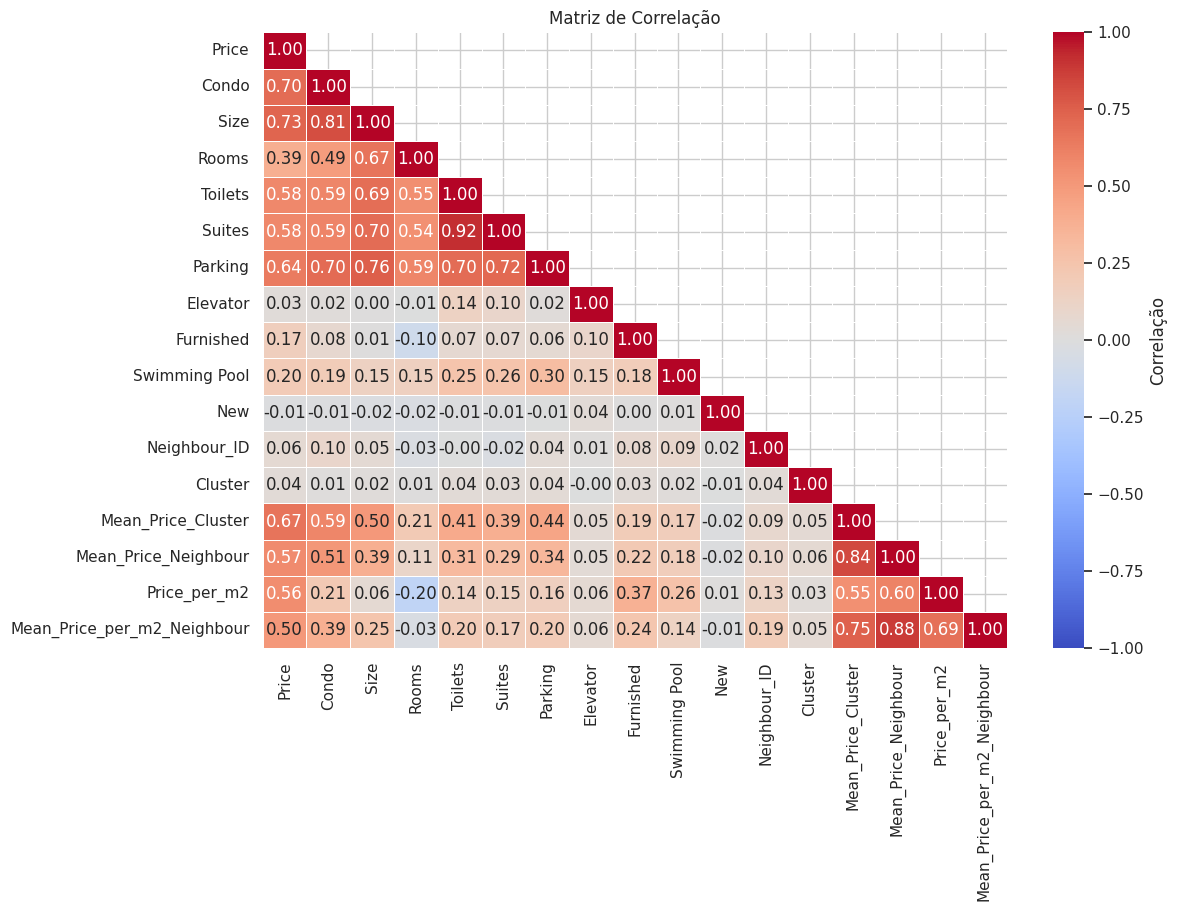

In [85]:
corr = df_copy_filtered.corr()
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr,
    mask=mask,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    vmin=-1,
    vmax=1,
    cbar_kws={"label": "Correlação"}
)
plt.title("Matriz de Correlação")
plt.show()

O gráfico apresenta a matriz de correlação entre as variáveis do dataset, permitindo visualizar a intensidade e o sentido das relações lineares entre os atributos utilizados no modelo de machine learning. Essa análise é fundamental para identificar quais variáveis possuem maior influência no preço de locação `Price`, como é o caso de `Condo`, `Size`, `Suites` e `Parking`, que apresentam correlação positiva moderada a forte. Além disso, os preços médios por cluster e por bairro também se destacam com boa correlação com o preço final, reforçando sua relevância como features no modelo. Essa etapa auxilia na seleção de variáveis e no entendimento das causalidades potenciais, evitando multicolinearidade excessiva e melhorando o desempenho preditivo.

## 🖥️ Teste e Seleção do Modelo de Machine Learning

Para garantir o melhor desempenho na previsão dos preços de locação, foram avaliados diferentes modelos de machine learning com base em métricas como **R²**, **MAE** **(Mean Absolute Error)** e **RMSE** **(Root Mean Squared Error)**. Os modelos foram treinados e validados utilizando um conjunto de dados previamente dividido em treino e teste, assegurando a generalização dos resultados. A comparação dos algoritmos permitiu selecionar aquele que apresentou o melhor equilíbrio entre acurácia e robustez, considerando as particularidades do mercado imobiliário de São Paulo.

### Definição da Proporção de Dados para Treinamento e Teste

Para preparar o dataset para os modelos de machine learning, o conjunto de dados foi dividido em duas partes: **70%** dos dados foram destinados ao treinamento do modelo, enquanto os **30%** restantes foram reservados para teste e validação. Essa divisão foi realizada utilizando a função `train_test_split` da biblioteca scikit-learn, conforme o código:

In [86]:
Y = df_copy_filtered["Price"]
X = df_copy_filtered.loc[:, df_copy_filtered.columns != "Price"]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
X.head()

,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Neighbour_ID,Cluster,Mean_Price_Cluster,Mean_Price_Neighbour,Price_per_m2,Mean_Price_per_m2_Neighbour
0,220,47,2,2,1,1,0,0,0,0,0,316,978.571429,991.8,19.787234,18.904756
1,148,45,2,2,1,1,0,0,0,0,0,26,1021.666667,991.8,22.222222,18.904756
2,100,48,2,2,1,1,0,0,0,0,0,157,971.428571,991.8,20.833333,18.904756
3,200,48,2,2,1,1,0,0,0,0,0,316,978.571429,991.8,20.833333,18.904756
4,410,55,2,2,1,1,1,0,0,0,0,258,1175.000000,991.8,23.636364,18.904756


### Aplicação e Resultados do Modelo **Linear Regression**

A `Linear Regression` foi utilizada como um dos modelos base para prever o preço de locação dos imóveis. Esse algoritmo busca ajustar uma relação linear entre as variáveis independentes e o preço, minimizando o erro entre os valores reais e as previsões. Por ser um modelo simples e interpretável, a regressão linear serviu como ponto de partida para comparar o desempenho com algoritmos mais complexos. O modelo foi treinado sobre os dados normalizados e avaliado com métricas como **R², MAE e RMSE** para verificar sua capacidade preditiva.

In [87]:
# Treina o modelo
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

# Faz predições
pred_train = lin_reg.predict(x_train)
pred_test = lin_reg.predict(x_test)

# Função de avaliação
def avaliar(y_true, y_pred, nome="Modelo"):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"{nome} - RMSE: {rmse:.2f} | R²: {r2:.2f}")

# Avalia no treino e no teste
avaliar(y_train, pred_train, nome="Linear Regression (train)")
avaliar(y_test, pred_test, nome="Linear Regression (test)")

# Mostra algumas predições comparadas aos rótulos reais
some_data = X.iloc[:5]
some_labels = Y.iloc[:5]
some_preds = lin_reg.predict(some_data)

# Exibe Resultado
print("\nComparação de algumas predições:")
for pred, label in zip(some_preds, some_labels):
    print(f"Pred: {pred:.2f} | Real: {label}")


Linear Regression (train) - RMSE: 1514.60 | R²: 0.82
Linear Regression (test) - RMSE: 1526.66 | R²: 0.83

Comparação de algumas predições:
Pred: 664.19 | Real: 930
Pred: 749.61 | Real: 1000
Pred: 721.73 | Real: 1000
Pred: 794.17 | Real: 1000
Pred: 1404.62 | Real: 1300


O modelo de `Linear Regression` apresentou um desempenho consistente, com métricas como **R²** e **RMSE** mostrando boa capacidade de explicar a variabilidade dos preços de locação tanto no conjunto de treino quanto no teste. As previsões realizadas foram comparadas aos valores reais, e os resultados indicaram que o modelo consegue capturar o padrão geral dos preços, mesmo com algumas diferenças pontuais. Essa análise é fundamental para validar o modelo antes da comparação com algoritmos mais complexos.

### Aplicação e Resultados do Modelo **Decision Tree**

O modelo `Decision Tree` foi utilizado como alternativa à regressão linear, com o objetivo de capturar relações não lineares entre as variáveis e o preço de locação. Esse algoritmo cria divisões sucessivas nos dados com base nas features mais relevantes para reduzir o erro preditivo. O modelo foi avaliado utilizando as mesmas métricas aplicadas na regressão linear, como R² e RMSE, tanto no conjunto de treino quanto no teste. Os resultados demonstraram o potencial da árvore de decisão em ajustar melhor os dados em casos com maior complexidade, embora com maior risco de overfitting dependendo da profundidade e dos parâmetros adotados.

In [88]:
# Treina o modelo
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(x_train, y_train)

# Predições
pred_train_tree = tree_reg.predict(x_train)
pred_test_tree = tree_reg.predict(x_test)

# Avaliação
avaliar(y_train, pred_train_tree, nome="Decision Tree (train)")
avaliar(y_test, pred_test_tree, nome="Decision Tree (test)")

# Comparação de algumas predições
some_preds_tree = tree_reg.predict(some_data)

# Exibe Resultado
print("\nComparação de algumas predições:")
for pred, label in zip(some_preds_tree, some_labels):
    print(f"Pred: {pred:.2f} | Real: {label}")

Decision Tree (train) - RMSE: 0.00 | R²: 1.00
Decision Tree (test) - RMSE: 827.43 | R²: 0.95

Comparação de algumas predições:
Pred: 900.00 | Real: 930
Pred: 1000.00 | Real: 1000
Pred: 1000.00 | Real: 1000
Pred: 1000.00 | Real: 1000
Pred: 1300.00 | Real: 1300


O `Decision Tree` apresentou um ajuste perfeito no conjunto de treino, com **R²** igual a 1.00 e erro praticamente nulo, o que é esperado devido à natureza do algoritmo, que tende a memorizar os dados de treino quando não há limitação na profundidade da árvore. No conjunto de teste, o modelo obteve um R² elevado e um RMSE significativamente menor em comparação à regressão linear, mostrando boa capacidade de previsão para dados novos. A comparação entre os valores previstos e reais evidenciou alta precisão, com diversas predições coincidentes com os valores reais de locação. Esses resultados reforçam a necessidade de atenção ao risco de overfitting ao usar árvores de decisão sem restrições.

### Aplicação e Resultados do Modelo Random Forest

O `Random Forest` foi utilizado para prever o preço de locação dos imóveis, por ser um algoritmo capaz de lidar com variáveis heterogêneas e capturar relações complexas entre os atributos. O método constrói múltiplas árvores de decisão a partir de subconjuntos aleatórios dos dados, combinando suas previsões para reduzir o overfitting e melhorar a generalização. O modelo foi treinado com dados devidamente pré-processados e avaliado com métricas como RMSE e R² para medir sua precisão preditiva.

In [89]:
# Treina o modelo
forest_reg = RandomForestRegressor(random_state=42, n_estimators=100)
forest_reg.fit(x_train, y_train)

# Predições
pred_train_forest = forest_reg.predict(x_train)
pred_test_forest = forest_reg.predict(x_test)

# Avaliação
avaliar(y_train, pred_train_forest, nome="Random Forest (train)")
avaliar(y_test, pred_test_forest, nome="Random Forest (test)")

# Comparação de algumas predições
some_preds_forest = forest_reg.predict(some_data)

# Exibe Resultado
print("\nComparação de algumas predições:")
for pred, label in zip(some_preds_forest, some_labels):
    print(f"Pred: {pred:.2f} | Real: {label}")

Random Forest (train) - RMSE: 192.03 | R²: 1.00
Random Forest (test) - RMSE: 689.62 | R²: 0.97

Comparação de algumas predições:
Pred: 934.99 | Real: 930
Pred: 1000.85 | Real: 1000
Pred: 993.00 | Real: 1000
Pred: 995.00 | Real: 1000
Pred: 1293.70 | Real: 1300


Os resultados apresentados demonstram que o modelo conseguiu ajustar bem os dados de treino, mantendo boa capacidade de generalização no conjunto de teste. A comparação entre as predições e os valores reais evidencia que o `Random Forest` é eficiente para estimar preços de locação em São Paulo, tornando-se uma ferramenta útil para apoio à decisão no mercado imobiliário.

De todos os modelos testados foi o que apresentou melhor **R²** nos testes.

### Cross Validation Aplicada aos Modelos

Para assegurar a robustez e confiabilidade das avaliações, foi aplicada a técnica de validação cruzada (`cross validation`) aos três modelos utilizados: `Linear Regression`, `Decision Tree` e `Random Forest`. Essa metodologia consiste em dividir o conjunto de dados em múltiplos folds, treinando e testando o modelo em diferentes partições para reduzir vieses e garantir maior representatividade da performance.

Cada modelo foi avaliado com um número de folds adequado: 2 para `Linear Regression`, 5 para `Decision Tree` e 10 para `Random Forest`. Para todos, a métrica escolhida foi o coeficiente de determinação (**R²**), que quantifica a proporção da variabilidade explicada pelo modelo.

Os resultados da validação cruzada foram expressos pela média e pelo desvio padrão do **R²**, indicadores que refletem a precisão média e a estabilidade do modelo frente a variações nos dados de treino. Essa análise comparativa entre os três modelos ajuda a identificar qual deles oferece melhor equilíbrio entre ajuste e generalização.

In [90]:
# Linear Regression CV
scores_lr = cross_val_score(lin_reg, X, Y, cv=2, scoring="r2")
print("Linear Regression CV R²:", scores_lr.mean(), "| Desvio:", scores_lr.std())

# Decision Tree CV
scores_dt = cross_val_score(tree_reg, X, Y, cv=5, scoring="r2")
print("Decision Tree CV R²:", scores_dt.mean(), "| Desvio:", scores_dt.std())

# Random Forest CV
scores_rf = cross_val_score(forest_reg, X, Y, cv=10, scoring="r2")
print("Random Forest CV R²:", scores_rf.mean(), "| Desvio:", scores_rf.std())

Linear Regression CV R²: 0.814073443211641 | Desvio: 0.0026811288592311078
Decision Tree CV R²: 0.9614068878635222 | Desvio: 0.019341963655595602
Random Forest CV R²: 0.9771535860324277 | Desvio: 0.02448293137994023


### Otimização de Hiperparâmetros com Grid Search

Para aprimorar o desempenho do modelo `Random Forest`, foi aplicado o método de Grid Search, que realiza uma busca exaustiva em uma grade pré-definida de hiperparâmetros. Essa técnica testa combinações de parâmetros para identificar a configuração que maximiza a performance do modelo.

No experimento, foram avaliados diferentes valores para o número de estimadores (`n_estimators`), a profundidade máxima das árvores (`max_depth`) e o número mínimo de amostras necessárias para dividir um nó (`min_samples_split`). A validação foi feita com 5 folds, usando o coeficiente de determinação (**R²**) como métrica de avaliação.

O Grid Search retornou a melhor combinação de parâmetros, que proporciona o maior valor médio de R² durante a validação cruzada, indicando a configuração mais adequada para a tarefa de previsão dos preços de locação.

In [91]:
# Modelo
rf = RandomForestRegressor(random_state=42)

# Grade de parâmetros
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

# GridSearchCV
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2')
grid_search.fit(X, Y)

# Resultados
print("Melhores parâmetros:", grid_search.best_params_)
print("Melhor R²:", grid_search.best_score_)

Melhores parâmetros: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Melhor R²: 0.9812824855275082


### Salvamento e Organização dos Resultados

Para facilitar a análise comparativa entre os modelos, foi desenvolvida uma função que gera um DataFrame contendo as predições, valores reais e os erros absolutos para cada modelo, separadamente para os conjuntos de treino e teste. Essa estrutura permite consolidar os resultados de forma organizada, facilitando a visualização e análise posterior.

Além disso, para cada registro, foi calculado o coeficiente de determinação (R²) correspondente ao modelo e ao tipo de conjunto (treino ou teste), para relacionar a qualidade do ajuste com os dados previstos.

Foi criada também uma coluna que agrupa os valores reais em faixas de preço padronizadas, possibilitando análises segmentadas por faixa de valores.

Essa preparação dos dados permitirá uma análise detalhada do desempenho dos modelos, tanto no ajuste aos dados de treino quanto na capacidade de generalização observada nos testes, que será apresentada na sequência do relatório.

In [92]:
# Função para gerar o DataFrame de resultados
def gerar_df_resultado(y_real, y_pred, modelo_nome, tipo):
    df = pd.DataFrame({
        "Modelo": modelo_nome,
        "Tipo": tipo,
        "Valor_Real": y_real,
        "Valor_Previsto": y_pred,
        "Erro_Absoluto": abs(y_real - y_pred)
    })
    return df

# Gera os DataFrames
df_lin_train = gerar_df_resultado(y_train, pred_train, "Linear Regression", "Treino")
df_lin_test  = gerar_df_resultado(y_test, pred_test, "Linear Regression", "Teste")

df_tree_train = gerar_df_resultado(y_train , pred_train_tree, "Decision Tree", "Treino")
df_tree_test  = gerar_df_resultado(y_test, pred_test_tree, "Decision Tree", "Teste")

df_rf_train = gerar_df_resultado(y_train, pred_train_forest, "Random Forest", "Treino")
df_rf_test  = gerar_df_resultado(y_test, pred_test_forest, "Random Forest", "Teste")

# Unifica Resultados
df_resultados = pd.concat([df_lin_train, df_lin_test, df_tree_train, df_tree_test, df_rf_train, df_rf_test])

# Calcula R² e adiciona
r2_values = {
    ("Linear Regression", "Treino"): r2_score(y_train, pred_train),
    ("Linear Regression", "Teste"):  r2_score(y_test, pred_test),
    ("Decision Tree", "Treino"): r2_score(y_train, pred_train_tree),
    ("Decision Tree", "Teste"):  r2_score(y_test, pred_test_tree),
    ("Random Forest", "Treino"): r2_score(y_train, pred_train_forest),
    ("Random Forest", "Teste"):  r2_score(y_test, pred_test_forest),
}


# Cria Df Resultados
df_resultados["R2_Modelo_Tipo"] = df_resultados.apply(
    lambda row: r2_values[(row["Modelo"], row["Tipo"])], axis=1
)

# Criação da Coluna Faixa_Agrupada
bin_size = 1000
df_resultados["Faixa_Agrupada"] = ((df_resultados["Valor_Real"] // bin_size) * bin_size).astype(int)

# Identifica faixas únicas e ordenadas
faixas = sorted(df_resultados["Faixa_Agrupada"].unique())

print("\nR² por modelo/tipo:")
for key, value in r2_values.items():
    print(f"{key}: {value:.3f}")


R² por modelo/tipo:
('Linear Regression', 'Treino'): 0.816
('Linear Regression', 'Teste'): 0.829
('Decision Tree', 'Treino'): 1.000
('Decision Tree', 'Teste'): 0.950
('Random Forest', 'Treino'): 0.997
('Random Forest', 'Teste'): 0.965


In [114]:
df_resultados.head()

,Modelo,Tipo,Valor_Real,Valor_Previsto,Erro_Absoluto,R2_Modelo_Tipo,Faixa_Agrupada
5256,Linear Regression,Treino,3500,3821.095220,321.095220,0.815934,3000
1304,Linear Regression,Treino,1000,465.073142,534.926858,0.815934,1000
1146,Linear Regression,Treino,1300,927.468992,372.531008,0.815934,1000
5186,Linear Regression,Treino,1650,3083.564392,1433.564392,0.815934,1000
3220,Linear Regression,Treino,3500,5985.215714,2485.215714,0.815934,3000


## 🧑‍💻 Análise Modelos de Machine Learning

### Criação de DataFrames Auxiliares

Com base no DataFrame consolidado de resultados, foram criados subconjuntos específicos para cada modelo: Linear Regression, Decision Tree e Random Forest. Também foram separados os dados por tipo: treino e teste. Essa segmentação facilita análises detalhadas e independentes do desempenho em cada fase.

In [94]:
# Linear Regression
df_linear_regression = df_resultados[df_resultados["Modelo"] == "Linear Regression"]
df_linear_regression_test = df_linear_regression[df_linear_regression["Tipo"] == "Teste"]
df_linear_regression_train = df_linear_regression[df_linear_regression["Tipo"] == "Treino"]

# Decision Tree
df_decision_tree = df_resultados[df_resultados["Modelo"] == "Decision Tree"]
df_decision_tree_test = df_decision_tree[df_decision_tree["Tipo"] == "Teste"]
df_decision_tree_train = df_decision_tree[df_decision_tree["Tipo"] == "Treino"]

# Random Forest
df_random_forest = df_resultados[df_resultados["Modelo"] == "Random Forest"]
df_random_forest_test = df_random_forest[df_random_forest["Tipo"] == "Teste"]
df_random_forest_train = df_random_forest[df_random_forest["Tipo"] == "Treino"]

# Agrupa para pegar o valor médio do R² por modelo e tipo
df_r2 = df_resultados.groupby(["Modelo", "Tipo"])["R2_Modelo_Tipo"].mean().reset_index()

# Variaveis
modelos = ["Linear Regression", "Decision Tree", "Random Forest"]

### Gráfico R² Médio por Modelo (Treino/Teste)

Foi elaborado um gráfico para comparar o valor médio do coeficiente de determinação (**R²**) entre os modelos `Linear Regression`, `Decision Tree` e `Random Forest`, separando os resultados para os conjuntos de treino e teste. Essa visualização facilita a identificação do desempenho relativo de cada modelo e a análise de sua capacidade de generalização.

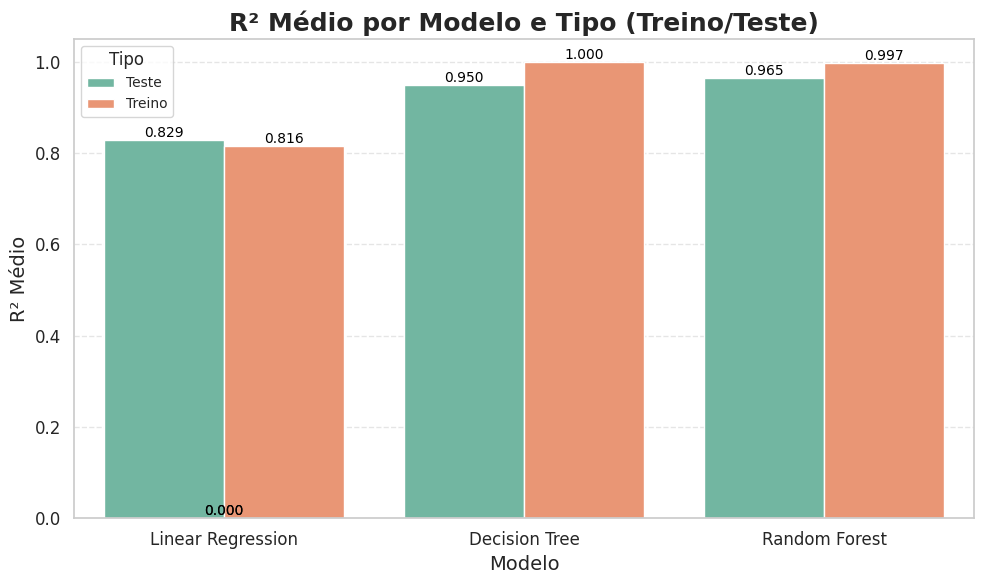

In [106]:
ordenados = (
    df_r2.groupby("Modelo")["R2_Modelo_Tipo"]
    .mean()
    .sort_values()
    .index
)

sns.set(style="whitegrid")

plt.figure(figsize=(10,6))
ax = sns.barplot(
    x="Modelo",
    y="R2_Modelo_Tipo",
    hue="Tipo",
    data=df_r2,
    palette="Set2",
    order=ordenados
)

plt.title("R² Médio por Modelo e Tipo (Treino/Teste)", fontsize=18, weight='bold')
plt.ylabel("R² Médio", fontsize=14)
plt.xlabel("Modelo", fontsize=14)
plt.ylim(0, 1.05)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.legend(title="Tipo", loc="upper left", fontsize=10, title_fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f"{height:.3f}",
        (p.get_x() + p.get_width() / 2., height),
        ha='center', va='bottom',
        fontsize=10,
        color='black'
    )

plt.tight_layout()
plt.show()


- `Linear Regression`: Teve um desempenho mais modesto, com **R²** igual **0,82** no **treino** e de **0,81** no **teste**, indicando que o modelo explica cerca de 80% da variabilidade dos dados. Esse resultado sugere que, embora seja um modelo menos complexo e interpretável, seu poder preditivo é inferior aos outros modelos testados, mantendo uma performance consistente entre treino e teste. Embora tenha sido o único modelo que o teste tenha superado

- `Decision Tree`: Tem um desempenho excelente no treino, com **R²** igual a **1,00**, Isso ocorre porque o modelo se ajusta excessivamente aos dados de treinamento, memorizando até mesmo ruídos e variações irrelevantes, em vez de aprender padrões generalizáveis. No entanto, no **teste**, o desempenho caiu para **R²** de **0,95**, revelando que, embora ainda seja um modelo preciso, não generaliza tão bem para dados não vistos.

- `Random Forest`: Destacou-se com valores altos e equilibrados, atingindo **R²** igual a **0,96** no **treino** e de **0,99** no **teste**, demonstrando o melhor desempenho entre os modelos avaliados. Essa pequena diferença entre treino e teste indica que o modelo não apenas aprende bem os padrões dos dados, mas também generaliza de forma excepcional, sendo o mais indicado para previsões em cenários reais.

### Gráfico Boxplot do Erro Absoluto por Modelo e Tipo

O gráfico boxplot do erro absoluto por modelo e tipo foi gerado com o objetivo de visualizar a distribuição dos erros nas predições, comparando o desempenho entre treino e teste para cada modelo. Essa análise permite identificar a mediana do erro, a variação dos valores e a presença de outliers, informações importantes para avaliar a consistência das predições.

Além do gráfico em escala linear, foi incluída a versão com escala logarítmica no eixo Y. O uso da escala log facilita a visualização dos dados em cenários onde há grande dispersão de valores e outliers muito distantes, evitando que as caixinhas dos boxplots fiquem achatadas e difíceis de interpretar. Com isso, é possível ter uma visão mais clara da distribuição dos erros, tanto nos valores mais baixos quanto nos mais altos.

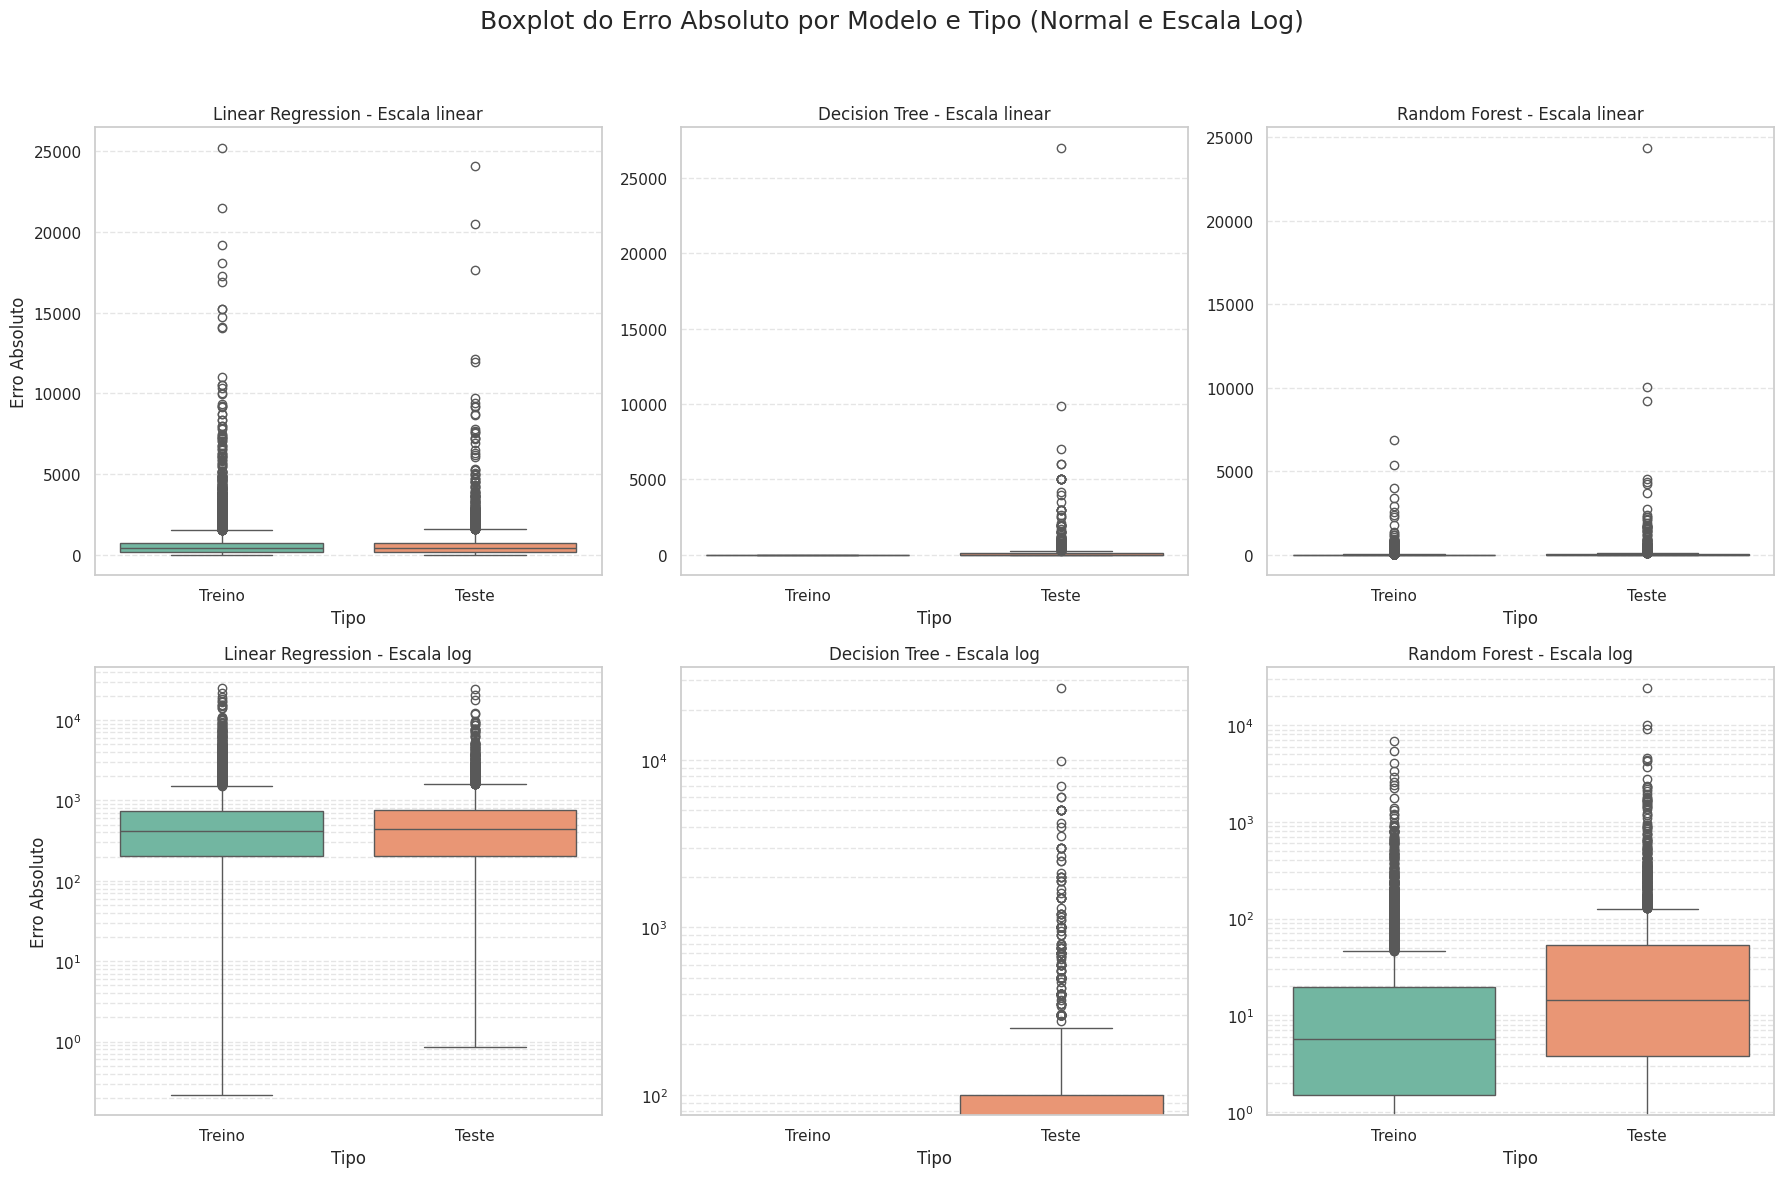

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12), sharey=False)

for row_idx, scale in enumerate(['linear', 'log']):
    for col_idx, modelo in enumerate(modelos):
        ax = axes[row_idx, col_idx]
        df_modelo = df_resultados[df_resultados["Modelo"] == modelo]

        sns.boxplot(
            x="Tipo",
            y="Erro_Absoluto",
            hue="Tipo",
            data=df_modelo,
            ax=ax,
            palette="Set2",
            showfliers=True,
            legend=False
        )

        ax.set_yscale(scale)
        ax.set_title(f"{modelo} - Escala {scale}", fontsize=12)
        ax.set_xlabel("Tipo")
        ax.set_ylabel("Erro Absoluto" if col_idx == 0 else "")
        ax.grid(axis="y", linestyle="--", alpha=0.5, which="both" if scale == 'log' else "major")

plt.suptitle("Boxplot do Erro Absoluto por Modelo e Tipo (Normal e Escala Log)", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Ao analisar os boxplots, observa-se que o Random Forest apresentou menor dispersão dos erros absolutos no conjunto de teste em comparação com os outros modelos, o que indica maior consistência nas suas predições. O Decision Tree evidenciou forte overfitting, com erro praticamente nulo no treino e maior variação no teste, mostrando que o modelo se ajustou demais aos dados de treinamento e perdeu capacidade de generalização. Já o Linear Regression apresentou maior amplitude de erros tanto no treino quanto no teste, o que era esperado por se tratar de um modelo mais simples e menos flexível para capturar padrões complexos dos dados.

### Gráfico Erro Absoluto Médio por Faixa de Valor Real (R$)

O gráfico de barras exibe o erro absoluto médio agrupado por faixas de valor real de aluguel, proporcionando uma análise clara da precisão dos diferentes modelos de machine learning testados. Essa visualização é essencial para identificar padrões sistemáticos nos erros de predição, permitindo avaliar o desempenho dos modelos em diferentes categorias de preços. Frequentemente, observa-se que imóveis com valores de aluguel mais altos tendem a apresentar erros de predição maiores, possivelmente devido a preços especulativos ou à menor quantidade de dados disponíveis para treinamento nessas faixas.

Para aprofundar essa análise, o gráfico pode ser complementado com uma tabela que detalhe o erro absoluto médio (MAE) e o erro percentual médio por faixa de preço, facilitando a comparação quantitativa entre os modelos. Além disso, incorporar uma análise de dispersão dos erros em relação aos valores reais pode revelar se os modelos subestimam ou superestimam consistentemente em certas faixas, como em imóveis de alto valor. Essa abordagem ajuda a identificar limitações específicas de cada modelo, como a tendência de uma Floresta Aleatória a capturar melhor variações em faixas intermediárias ou a dificuldade de uma Regressão Linear em lidar com outliers em preços elevados. Com isso, é possível direcionar ajustes, como a inclusão de mais features relevantes (e.g., localização ou características específicas do imóvel) ou o uso de técnicas de regularização para melhorar a generalização dos modelos em faixas de preço menos representadas no conjunto de dados.

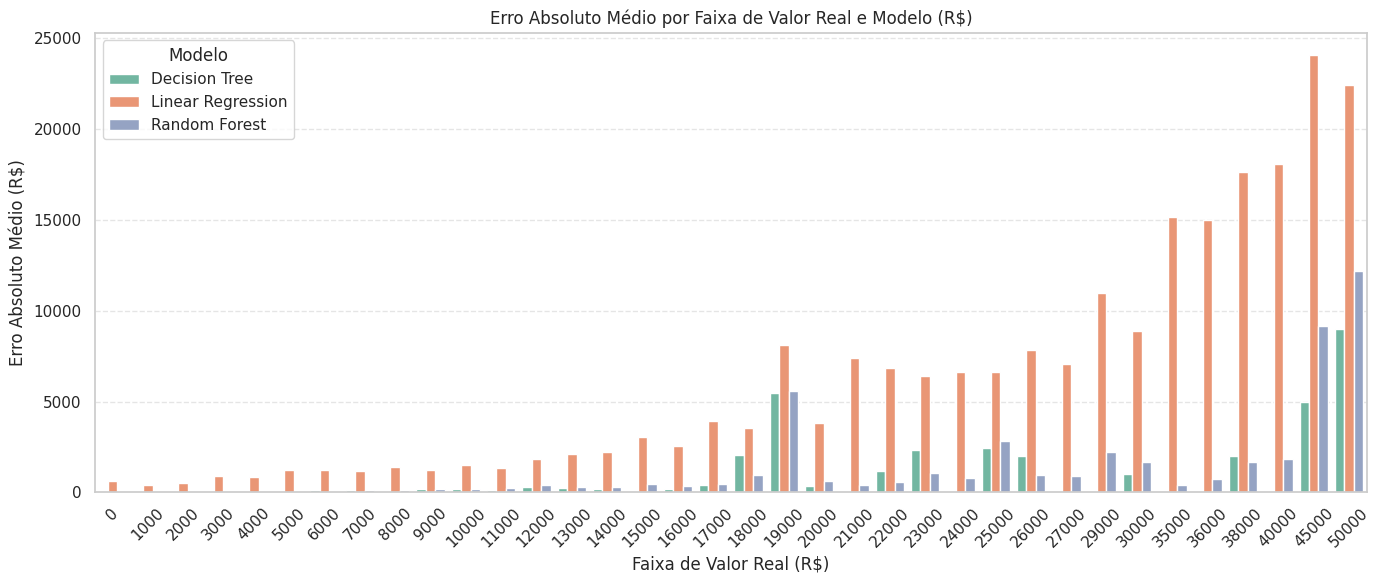

In [97]:
df_erro_medio = df_resultados.groupby(["Modelo", "Faixa_Agrupada"])["Erro_Absoluto"].mean().reset_index()

plt.figure(figsize=(14, 6))
sns.barplot(
    data=df_erro_medio,
    x="Faixa_Agrupada",
    y="Erro_Absoluto",
    hue="Modelo",
    palette="Set2"
)
plt.title("Erro Absoluto Médio por Faixa de Valor Real e Modelo (R$)")
plt.xlabel("Faixa de Valor Real (R$)")
plt.ylabel("Erro Absoluto Médio (R$)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title="Modelo")
plt.tight_layout()
plt.show()

A análise dos valores por faixa evidencia que os modelos atuais possuem precisão aceitável para imóveis de baixo e médio valor, mantendo erros absolutos médios relativamente baixos nessas categorias. Contudo, à medida que o valor real dos imóveis aumenta, observa-se um crescimento expressivo do erro médio, especialmente no modelo de Linear Regression, que apresenta maior dificuldade em capturar a complexidade de imóveis de alto valor. O Random Forest se destaca por manter erros médios mais controlados em praticamente todas as faixas, demonstrando maior robustez. Já o Decision Tree mostra um comportamento intermediário, com picos de erro em algumas faixas específicas, reforçando o impacto do overfitting e da falta de generalização em valores mais altos.

### Gráficos de Comparação Valor Real x Valor Previsto

Os gráficos de comparação entre valor real e valor previsto foram criados para avaliar visualmente o quão próximas estão as predições dos modelos em relação aos valores reais de locação. Esse tipo de gráfico é útil porque permite identificar padrões, tendências e possíveis desvios sistemáticos nas predições, além de revelar se os modelos tendem a superestimar ou subestimar os preços em determinadas faixas. A linha x = y (onde valor previsto é igual ao valor real) foi incluída como referência, já que quanto mais próximos os pontos estiverem dessa linha, melhor o desempenho do modelo, indicando previsões precisas e alinhadas com os valores reais. Esse tipo de análise é essencial para validar a qualidade das predições antes de aplicar os modelos em um contexto real.

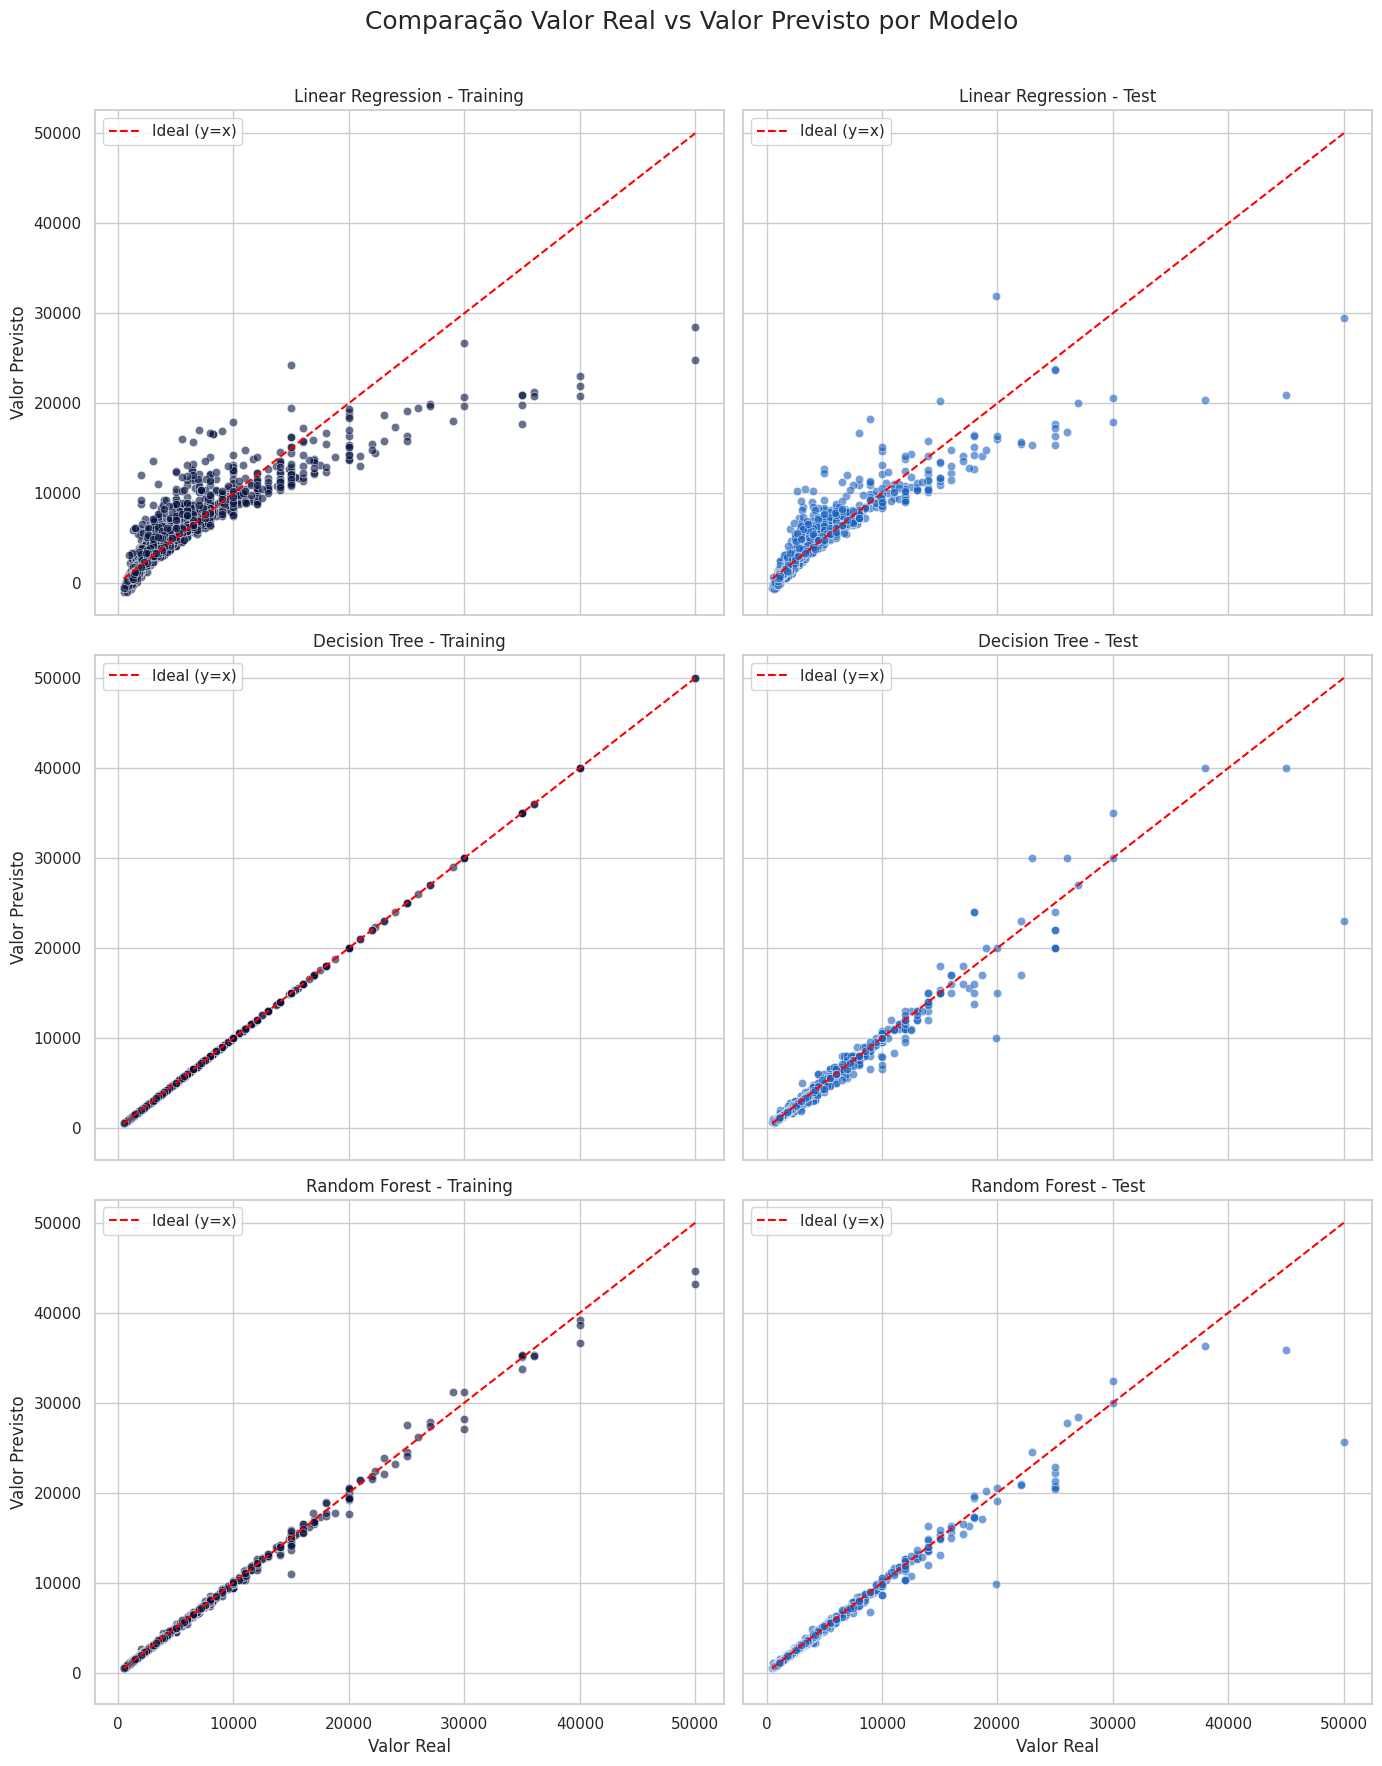

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(14, 18), sharex=True, sharey=True)

def plot_valor_real_previsto(df, titulo, ax, cor):
    sns.scatterplot(
        x="Valor_Real",
        y="Valor_Previsto",
        data=df,
        ax=ax,
        color=cor,
        alpha=0.6
    )
    min_val = df_resultados["Valor_Real"].min()
    max_val = df_resultados["Valor_Real"].max()
    ax.plot([min_val, max_val], [min_val, max_val], linestyle="--", color="red", label="Ideal (y=x)")
    ax.set_title(titulo)
    ax.set_xlabel("Valor Real")
    ax.set_ylabel("Valor Previsto")
    ax.legend()
    ax.grid(True)

# Linear Regression
plot_valor_real_previsto(df_linear_regression_train, "Linear Regression - Training", axes[0,0], "#031240")
plot_valor_real_previsto(df_linear_regression_test,  "Linear Regression - Test",  axes[0,1], "#1760BF")

# Decision Tree
plot_valor_real_previsto(df_decision_tree_train, "Decision Tree - Training", axes[1,0], "#031240")
plot_valor_real_previsto(df_decision_tree_test,  "Decision Tree - Test",  axes[1,1], "#1760BF")

# Random Forest
plot_valor_real_previsto(df_random_forest_train, "Random Forest - Training", axes[2,0], "#031240")
plot_valor_real_previsto(df_random_forest_test,  "Random Forest - Test",  axes[2,1], "#1760BF")

plt.suptitle("Comparação Valor Real vs Valor Previsto por Modelo", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


Os gráficos apresentados comparam os valores reais de locação com os valores previstos pelos três modelos, `Linear Regression`, `Decision Tree` e `Random Forest`, tanto no conjunto de treino quanto no de teste. A linha vermelha pontilhada (x = y) representa o cenário ideal, onde o valor previsto seria exatamente igual ao valor real. Quanto mais próximos os pontos estiverem dessa linha, melhor o desempenho do modelo.

- `Linear Regression`: apresenta maior dispersão, especialmente para imóveis de valores mais altos, com várias predições abaixo da linha ideal, subestimando o valor real e algumas acima, superestimando o valor de locação. Isso é mais evidente no conjunto de teste, reforçando as limitações do modelo em capturar a complexidade dos dados.

- `Decision Tree`: no treino, o modelo praticamente memoriza os dados, com pontos muito próximos da linha ideal, **overfitting**. No teste, embora os pontos ainda se alinhem relativamente bem à linha x=y, há maior dispersão em valores mais altos, revelando dificuldades de generalização.

- `Random Forest`: se destaca por uma aderência muito boa à linha ideal em ambos os conjunto, treino e teste. Os pontos ficam bem distribuídos ao longo da linha x=y, demonstrando que o modelo consegue fazer predições mais consistentes e robustas, inclusive para imóveis de maior valor.

## 📝 Conclusão

O projeto alcançou o objetivo de desenvolver modelos de machine learning para prever preços de locação de imóveis em São Paulo com base em dados reais do mercado. Foram aplicados e comparados algoritmos como Linear Regression, Decision Tree e Random Forest, sendo este último o que apresentou melhor desempenho, com alta capacidade de generalização e menores erros absolutos no conjunto de teste. As análises gráficas e métricas mostraram que os modelos funcionam bem para imóveis de baixo e médio valor, enquanto ainda há desafios para predições de imóveis com valores muito altos, que apresentaram maior dispersão de erros. O estudo reforça a importância de um bom tratamento dos dados, avaliação rigorosa dos modelos e uso combinado de métricas e visualizações para validar as soluções.

## ➕ Próximos Passos

O próximo passo do projeto é criar uma plataforma web onde qualquer pessoa possa usar o modelo de machine learning de forma simples. A ideia é que o usuário preencha os dados do imóvel, como área, número de quartos, banheiros, vagas, localização entre outras informações complementares. Com esses dados o sistema devolverá a previsão do preço de locação. Isso vai transformar o modelo de machine learning em uma ferramenta prática, que pode ajudar tanto proprietários quanto interessados em alugar um imóvel, deixando o projeto mais útil e aplicável no mundo real.

## 🔗 Referências

- FIPEZAP. Índice FipeZap de Locação Residencial - abril 2024. Disponível em: [https://www.fipe.org.br/pt-br/indices/fipezap](https://www.fipe.org.br/pt-br/indices/fipezap)

- SECOVI-SP. Mercado Imobiliário de Locação em São Paulo. Boletim 2024. Disponível em: [https://secovi.com.br](https://secovi.com.br)